Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [1]:
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [2]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    longitud=abs(xuno-xdos)
    m=(ydos-yuno)/(xdos-xuno)
    xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
    yresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        yresult[j]=round(Int,yuno+(j-1)*m)
    end
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

In [3]:
LFPSaturado=load("LFPDesaturado_3R7.jld", "LFPSaturados")
LFPPlanchado=load("LFPDesaturado_3R7.jld", "LFPDenoized")

Dict{AbstractString,Array{T,N}} with 3 entries:
  "Trancazo_2" => 64x64x248 Array{Float64,3}:…
  "Trancazo_1" => 64x64x248 Array{Float64,3}:…
  "Trancazo_3" => 64x64x248 Array{Float64,3}:…

In [4]:
tmax=248

248

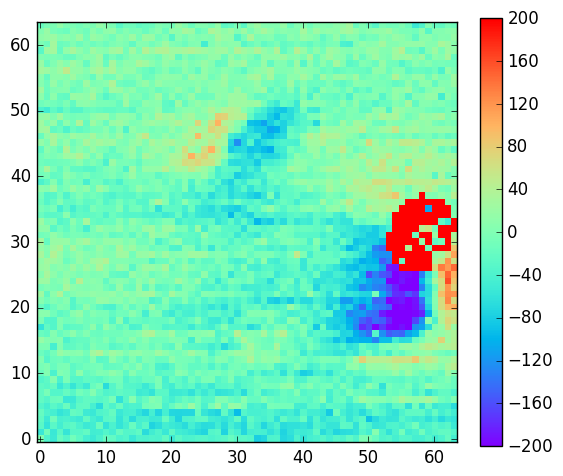

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd4da9c1e80>

In [11]:
ion()
limites=200
figure(figsize=(6,6))
cuadro=120
exdesaturado=LFPPlanchado["Trancazo_2"][:,:,cuadro];
imagen=imshow(exdesaturado, origin="lower", interpolation="nearest", cmap="rainbow", vmin=-limites,vmax=limites)
cb=colorbar(imagen, fraction=0.046)

In [9]:
puntox=[40,44,48,52,56, 60]
puntoy=[28,25,22,18,15, 12]
puntol=["F","E", "D", "C", "B","A"];
#=
puntoy=puntoy+3

primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([40,60],[28,12])
length(muchasx)

21

In [7]:
muchasx

21-element Array{Int64,1}:
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50
 51
 52
 53
 54
 55
 56
 57
 58
 59
 60

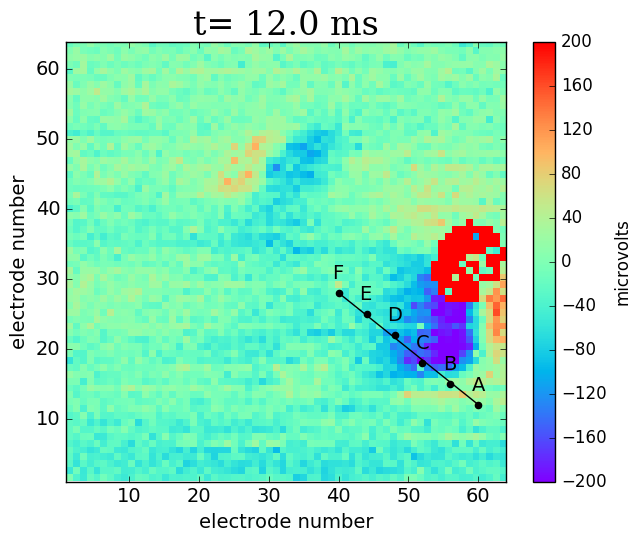

In [14]:
ion()
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)
milisec=round((cuadro-36)/7.022,1)

title("t= $milisec ms", fontdict=font1)
limites=200
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 1:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(-5,10), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="rainbow", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

scatter(puntox,puntoy, marker="o", s=20, c="black")

#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([40, 60], [28, 12], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

savefig("LFP_Electrodes_3R7-2-$cuadro.svg", dpi=90)

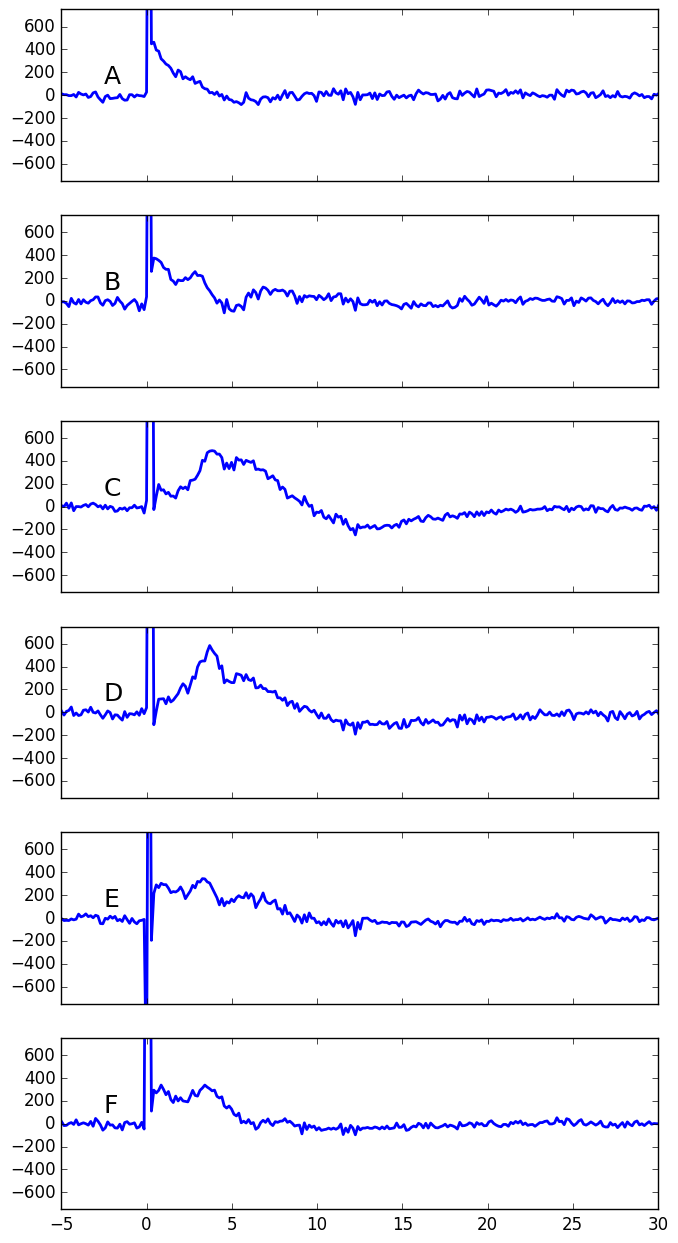

In [15]:
tiempo=1:tmax
t=700

farofa, lista=subplots(6, sharex=true, sharey=true, figsize=(7.7,6*2.5))

for j=1:6
    PyPlot.xlim(-5,30)
    PyPlot.ylim(-750,750)
    lista[j][:plot]((tiempo-36)/7.022,vec(LFPPlanchado["Trancazo_2"][puntoy[7-j],puntox[7-j],tiempo]),
    linewidth=2.0)
    lista[j][:annotate](puntol[7-j],xy=(-2.5,100), annotation_clip=false, fontsize=18)
end
savefig("PotencialesEvocadosSelectos_3R7-2.svg", dpi=96)

In [16]:
arregloparacascadaLFP=zeros(length(muchasx),tmax);
for j in 1:length(muchasx)
    arregloparacascadaLFP[j,:]=LFPPlanchado["Trancazo_2"][muchasx[j],muchasy[j],:]
end

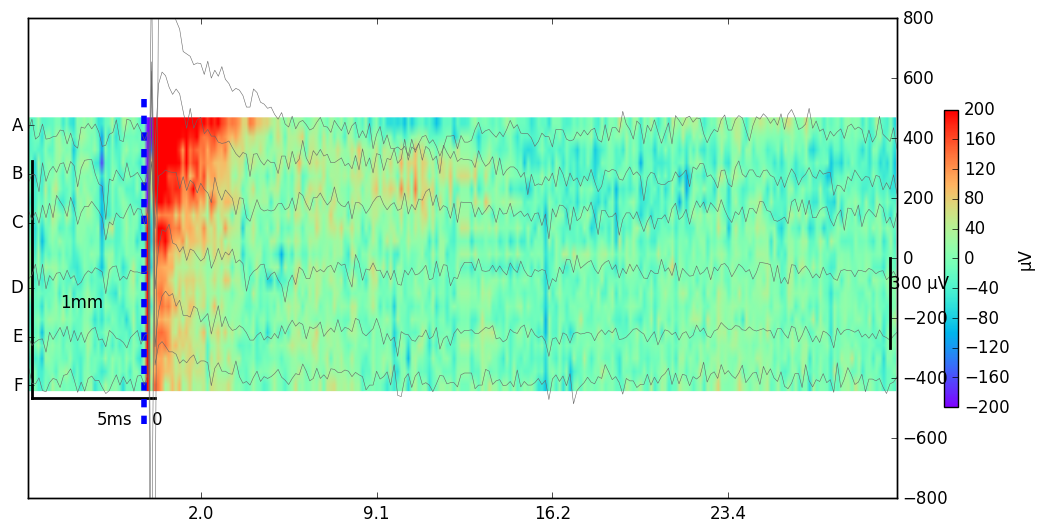

In [66]:
limites=200
fag, gaf=subplots(figsize=(12,6))
#The density plot
gaf[:set_xlim](1,tmax)
gaf[:set_ylim](20.5,0)
imagen=gaf[:imshow](arregloparacascadaLFP, cmap="rainbow", vmin=-limites, vmax=limites)
tiempoestampas=gaf[:axes][:get_xticks]()


gaf[:plot]([2,37.1],[21,21], "k-", lw=2)
gaf[:annotate]("5ms", (20.5,23))
gaf[:plot]([2,2],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (10,14))


#Some vertical lines
gaf[:plot]([34,34],[23,-2], "b--", lw=4)

gaf[:annotate]("0", (36,23))


#adjust aspcet ratioo
gaf[:axes][:set_aspect](3.7)
map!(x->round((x-36)/7.0224,1), tiempoestampas)
gaf[:axes][:set_xticklabels](tiempoestampas)
gaf[:set_yticks]((puntoy-12)*1.25)
gaf[:set_yticklabels](puntol)



#colorbar
cbx=colorbar(imagen, fraction=0.016)
cbx[:set_label]("µV")

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-800,800)
ga2[:set_xlim](1,tmax)

ga2[:plot](1:tmax, vec(arregloparacascadaLFP[20,1:tmax])-400, "-", linewidth=0.4, color="0.4")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[15,1:tmax])-250, "-", linewidth=0.4, color="0.4")
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[11,1:tmax])-45, "-", linewidth=0.4 , color="0.4")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[8,1:tmax])+160, "-", linewidth=0.4, color="0.4")
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[4,1:tmax])+295, "-", linewidth=0.4, color="0.4")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[1,1:tmax])+430, "-", linewidth=0.4,color="0.4")

ga2[:plot]([tmax-2,tmax-2],[-300,0], "k-", lw=2)
ga2[:annotate]("300 µV", (tmax-2,-100))

savefig("LFPPlanchado_espaciotiempo_3R7_2.svg",dpi=96)


In [67]:
CSD=load("CSDEvocada_3R7.jld", "CSD")
CSDPlanchado=load("CSDEvocada_3R7.jld", "CSDPlanchada")

Dict{AbstractString,Array{T,N}} with 3 entries:
  "Trancazo_2" => 62x62x248 Array{Float64,3}:…
  "Trancazo_1" => 62x62x248 Array{Float64,3}:…
  "Trancazo_3" => 62x62x248 Array{Float64,3}:…

In [70]:
excsd=CSD["Trancazo_2"][:,:,cuadro];

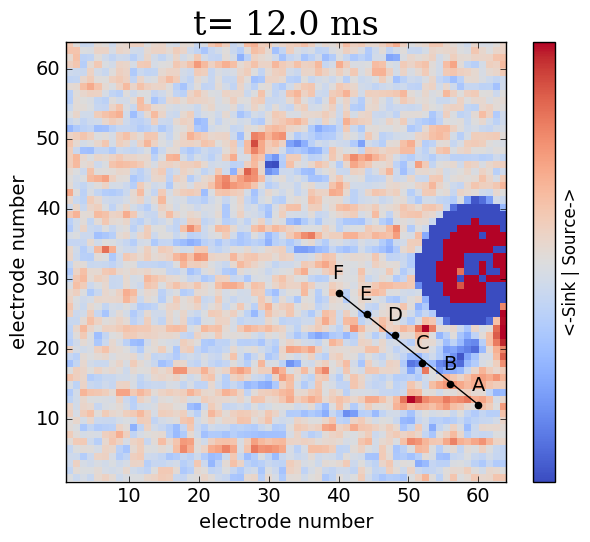

In [77]:

figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)
milisec=round((cuadro-36)/7.022,1)

title("t= $milisec ms", fontdict=font1)
limites=50
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 1:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(-5,10), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(excsd, 
interpolation="nearest", cmap="coolwarm", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

scatter(puntox,puntoy, marker="o", s=20, c="black")

#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([40, 60], [28, 12], "k-")

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

savefig("CSD_Electrodes_3R7-2-$cuadro.svg", dpi=90)

In [85]:
arregloparacascadaCSD=zeros(length(muchasx),tmax);
for j in 1:length(muchasx)
    arregloparacascadaCSD[j,:]=CSD["Trancazo_2"][muchasx[j],muchasy[j],:]
end

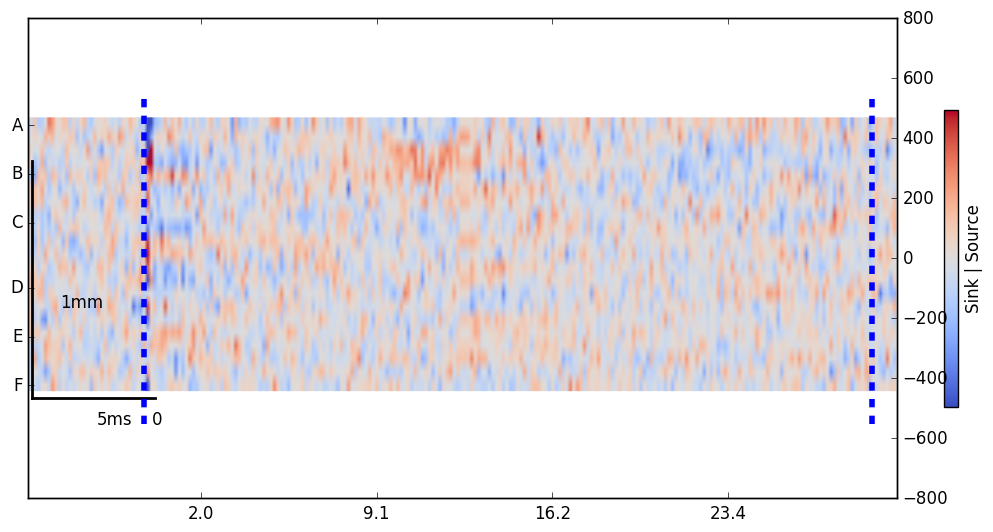

In [89]:
limites=45
fag, gaf=subplots(figsize=(12,6))
#The density plot
gaf[:set_xlim](1,tmax)
gaf[:set_ylim](20.5,0)
imagen=gaf[:imshow](arregloparacascadaCSD, cmap="coolwarm", vmin=-limites, vmax=limites)
tiempoestampas=gaf[:axes][:get_xticks]()


gaf[:plot]([2,37.1],[21,21], "k-", lw=2)
gaf[:annotate]("5ms", (20.5,23))
gaf[:plot]([2,2],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (10,14))


#Some vertical lines
gaf[:plot]([34,34],[23,-2], "b--", lw=4)

gaf[:plot]([tmax-7,tmax-7],[23,-2], "b--", lw=4)

gaf[:annotate]("0", (36,23))


#adjust aspcet ratioo
gaf[:axes][:set_aspect](3.7)
map!(x->round((x-36)/7.0224,1), tiempoestampas)
gaf[:axes][:set_xticklabels](tiempoestampas)
gaf[:set_yticks]((puntoy-12)*1.25)
gaf[:set_yticklabels](puntol)



#colorbar
cbx=colorbar(imagen, fraction=0.016, ticks=[])
cbx[:set_label]("Sink | Source")

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-800,800)
ga2[:set_xlim](1,tmax)
#=

ga2[:plot](1:tmax, vec(arregloparacascadaCSD[20,1:tmax])-400, "-", linewidth=0.4, color="0.4")
ga2[:plot]((1:tmax), vec(arregloparacascadaCSD[15,1:tmax])-250, "-", linewidth=0.4, color="0.4")
ga2[:plot](1:tmax, vec(arregloparacascadaCSD[11,1:tmax])-45, "-", linewidth=0.4 , color="0.4")
ga2[:plot]((1:tmax), vec(arregloparacascadaCSD[8,1:tmax])+160, "-", linewidth=0.4, color="0.4")
ga2[:plot](1:tmax, vec(arregloparacascadaCSD[4,1:tmax])+295, "-", linewidth=0.4, color="0.4")
ga2[:plot]((1:tmax), vec(arregloparacascadaCSD[1,1:tmax])+430, "-", linewidth=0.4,color="0.4")

ga2[:plot]([tmax-2,tmax-2],[-300,0], "k-", lw=2)
ga2[:annotate]("300 µV", (tmax-2,-100))
=#

savefig("CSDPlanchado_espaciotiempo_3R7_2.svg", dpi=96)